In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder


In [12]:
data = pd.read_csv(r'C:\Users\NANDINI\Downloads\ds_3\bank-additional\bank-additional.csv',sep=';')


In [22]:
X = data.drop(columns=['y'])
y = data['y'].map({'no': 0, 'yes': 1})

In [30]:
encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = encoder.fit_transform(X[col])

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [32]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8786407766990292


In [33]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       732
           1       0.46      0.47      0.46        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824



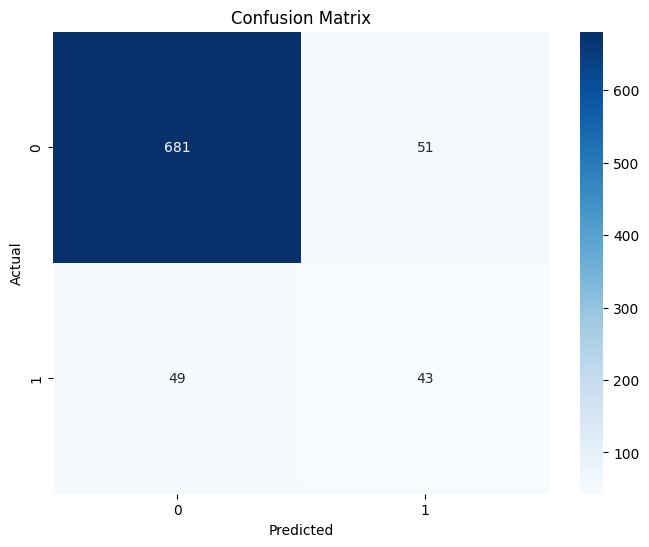

In [34]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

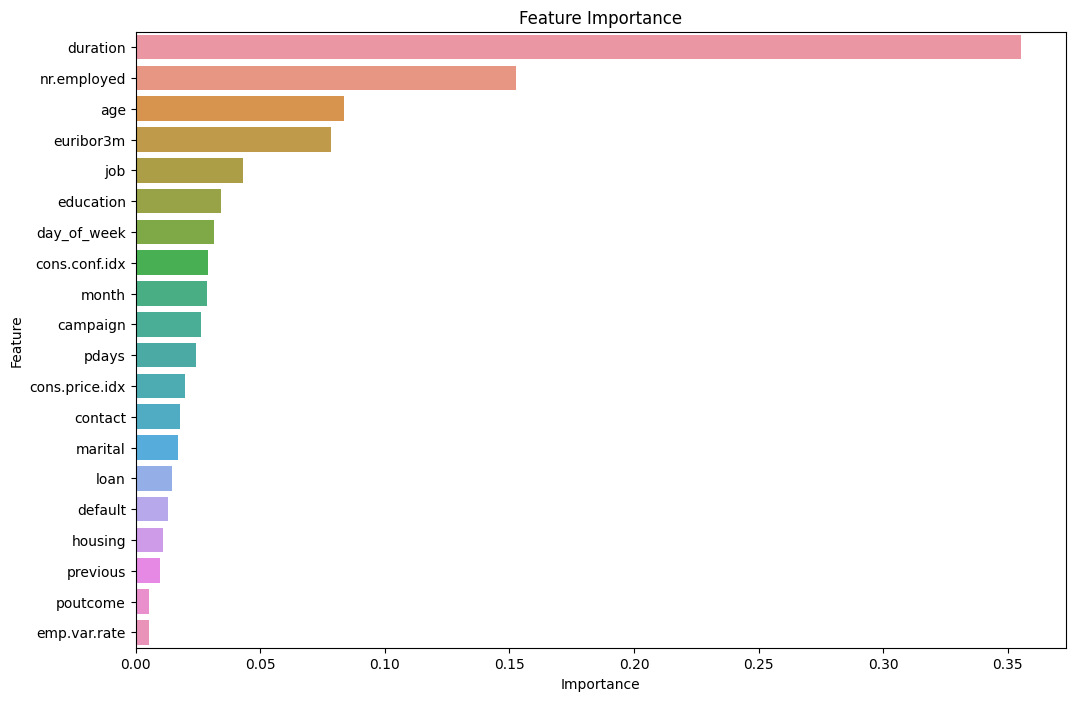

In [35]:
# Feature Importance
importances = clf.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

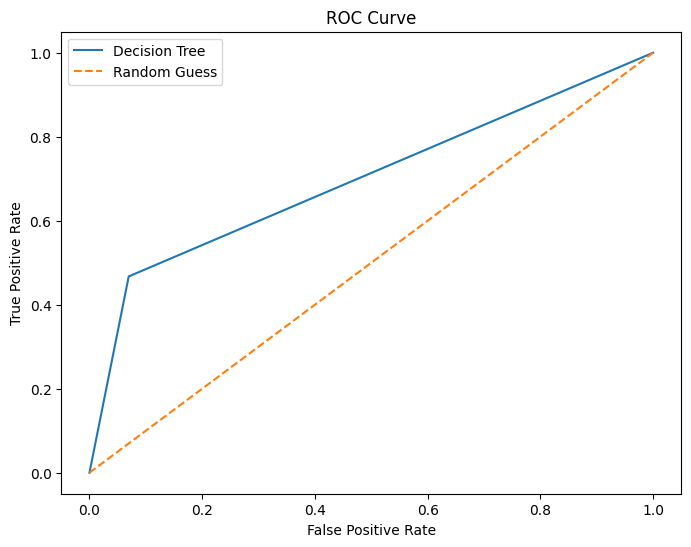

In [36]:
# ROC Curve
y_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6988595866001426


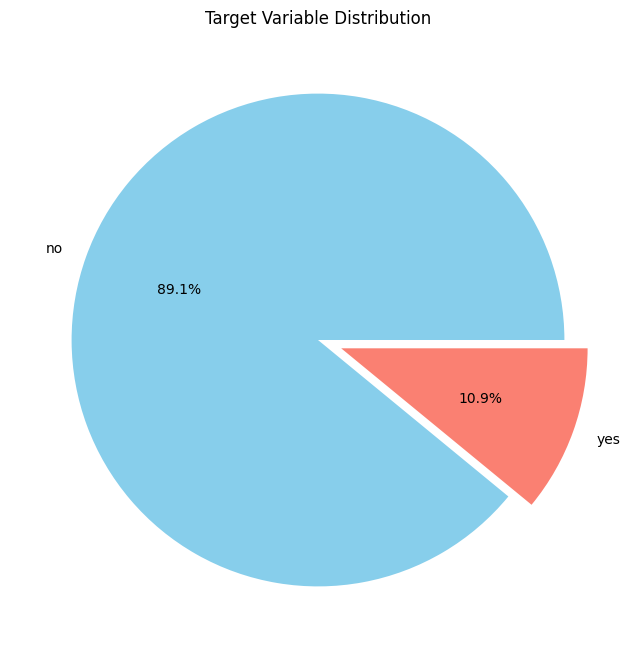

In [38]:
# Pie charts for visualization
plt.figure(figsize=(12, 8))
data['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], explode=(0, 0.1))
plt.title("Target Variable Distribution")
plt.ylabel('')
plt.show()

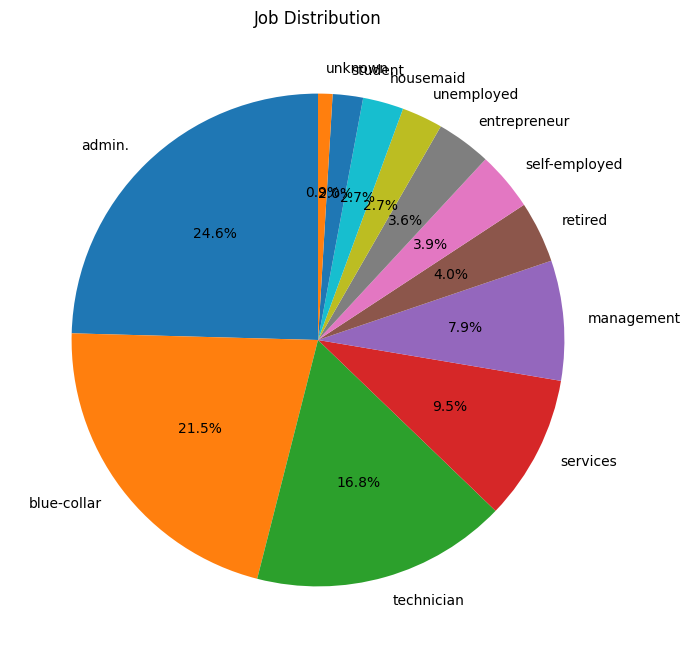

In [43]:
plt.figure(figsize=(12, 8))
data['job'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Job Distribution")
plt.ylabel('')
plt.show()

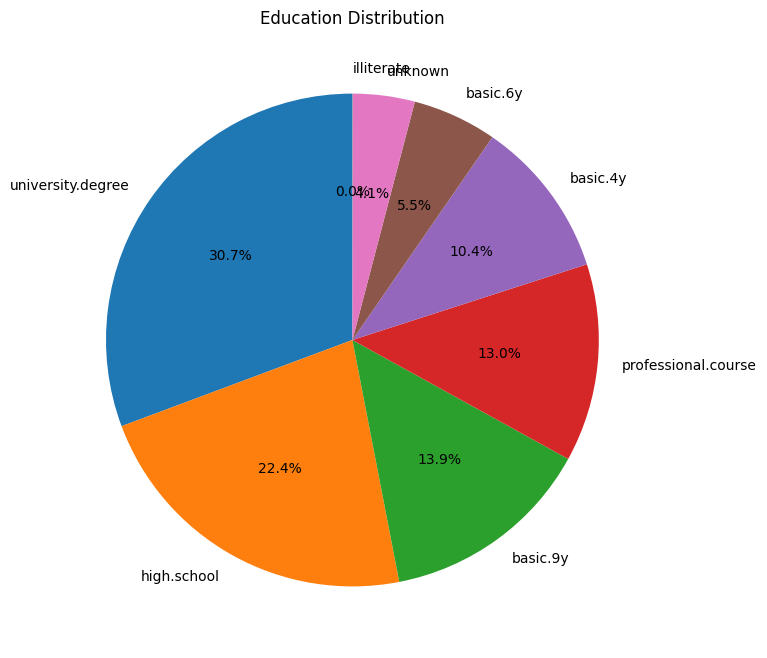

In [45]:
plt.figure(figsize=(12, 8))
data['education'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Education Distribution")
plt.ylabel('')
plt.show()

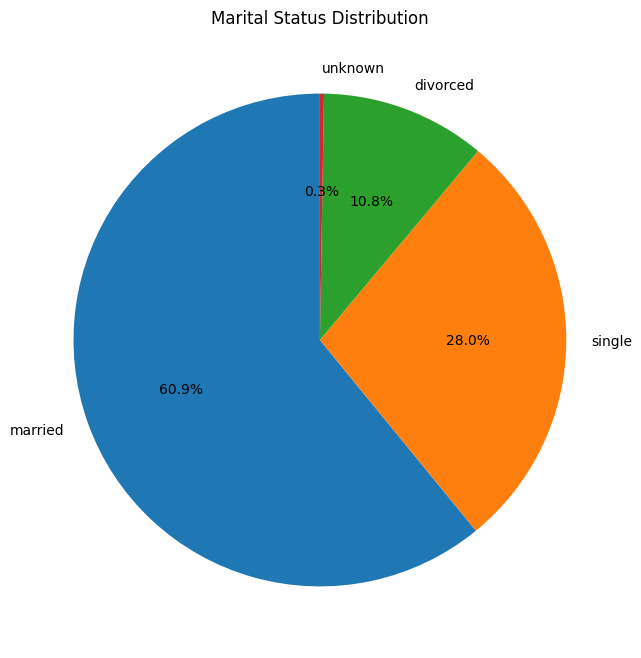

In [46]:
plt.figure(figsize=(12, 8))
data['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Marital Status Distribution")
plt.ylabel('')
plt.show()

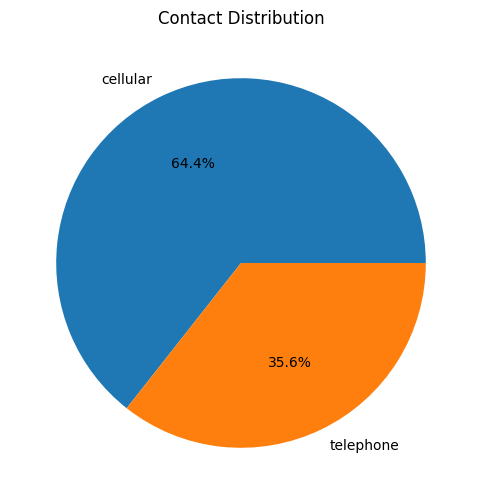

In [47]:
plt.figure(figsize=(8, 6))
data['contact'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Contact Distribution")
plt.ylabel('')
plt.show()

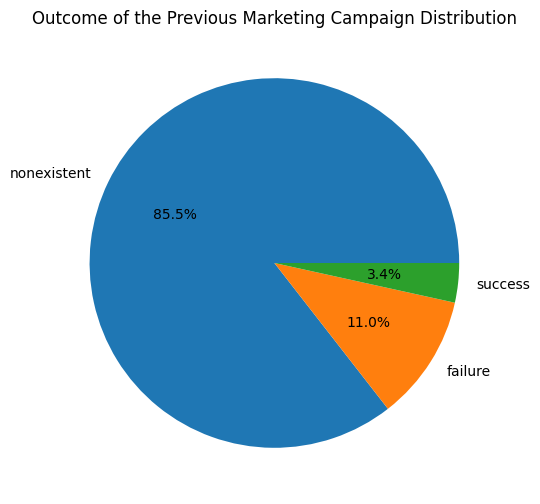

In [48]:
plt.figure(figsize=(8, 6))
data['poutcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Outcome of the Previous Marketing Campaign Distribution")
plt.ylabel('')
plt.show()